<a href="https://colab.research.google.com/github/Vamshi-01/AI/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: Estimate the bicarbonates of well water based on its pH value using polynomial regression model. Consider SGD optimizer.

Do the manual calculation for one iteration by taking only first
two samples in the dataset
Write the python code to build simple linear regression model
using SGD optimizer
Do the data normalization
Split the data for train and test (90:10)
Train the simple linear regression model using SGD with
training data
Compute MSE, RMSE and MAE with training data
Compute MSE, RMSE and MAE with testing data
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

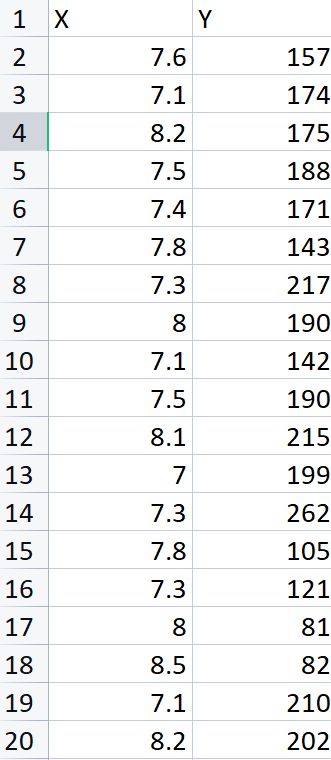

Import libraries

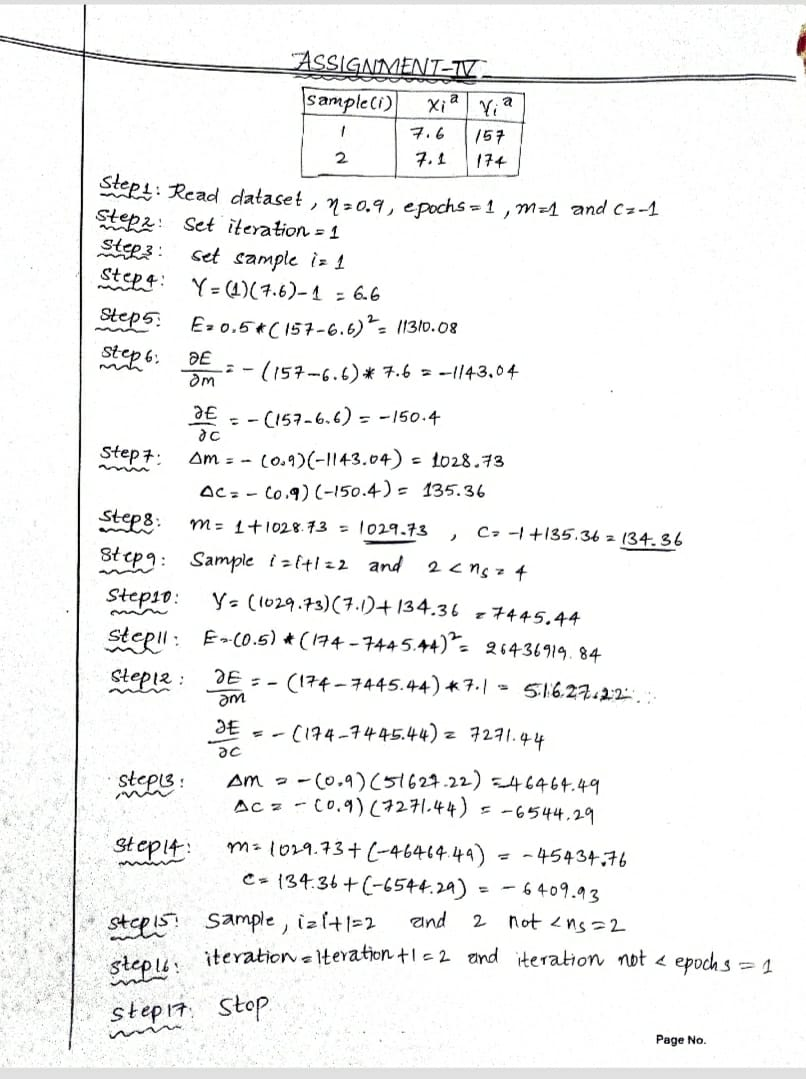

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import math as mt
import random
import pandas as pd

Import data

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/vam.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


Outliers Treatment

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [ ]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

Outliers in X column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


Missing value treatment

In [ ]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [ ]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


Data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.20, random_state = 10)

Initialisation

In [ ]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.0000001
max_iter=10000

Gradient calculation

In [ ]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

Training using stochatic gradient descent optimizer



In [ ]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m=m-eta*del_m
    c=c-eta*del_c
print('model parameter m and c',m,c)

model parameter m and c 12.507531162212084 4.778989704631846


Model prediction on training data

In [ ]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

Model predection on testimg data

In [ ]:
y_pred_test = []
for i in x_test:
  y_p_te = (m * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

Error matrics calculation

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 66.4795977140205
Mean square error 4419.536912218
Mean absolute error 56.96897007877649


In [ ]:
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 87.03245363884393
Mean square error 7574.647986397517
Mean absolute error 76.7954448852229
